In [47]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt

(low_H, low_S, low_V) = (0, 54, 169)
(high_H, high_S, high_V) = (14, 255, 255)
images = []

# Read image
for i in range(3):
    image = cv.imread(str(i+1) + '.jpg')
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    images.append(image)
    
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [52]:
def find_face(img, color_img):
    cnts,_ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key=lambda x: cv.contourArea(x), reverse=True)
    if cv.contourArea(cnts[0]) / cv.contourArea(cnts[1]) >= 2:
        for i in range(1):
            x,y,w,h = cv.boundingRect(cnts[i])
            cv.rectangle(color_img,(x,y),(x+w,y+h),(0,255,0),5)
    else:
        for i in range(2):
            x,y,w,h = cv.boundingRect(cnts[i])
            cv.rectangle(color_img,(x,y),(x+w,y+h),(0,255,0),5)

    plt.imshow(color_img)
    

window_name = 'Image'

cv.namedWindow(window_name, cv.WINDOW_NORMAL)


def remove_noise(img):
    kernel = (15, 15)
    img = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    return img

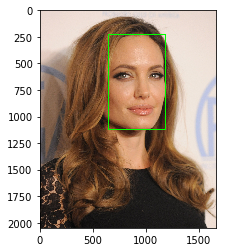

In [53]:
image_hsv = cv.cvtColor(images[0], cv.COLOR_RGB2HSV)
frame_threshold = cv.inRange(image_hsv, (low_H, low_S, low_V), (high_H, high_S, high_V))
find_face(frame_threshold, images[0])
plt.savefig('1_fd.jpg')

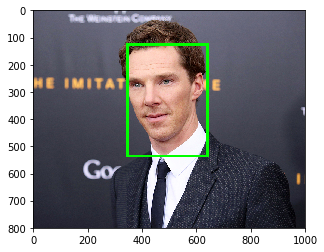

In [54]:
image_hsv = cv.cvtColor(images[1], cv.COLOR_RGB2HSV)
frame_threshold = cv.inRange(image_hsv, (low_H, low_S, low_V), (high_H, high_S, high_V))
find_face(frame_threshold, images[1])
plt.savefig('2_fd.jpg')

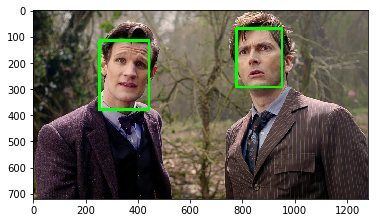

In [55]:
image_hsv = cv.cvtColor(images[2], cv.COLOR_RGB2HSV)
frame_threshold = cv.inRange(image_hsv, (low_H, low_S, low_V), (high_H, high_S, high_V))
find_face(frame_threshold, images[2])
plt.savefig('3_fd.jpg')